In [2]:
from astropy.table import Table
import numpy as np

from astropy.io import fits, ascii
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
import statistics
from statistics import mean
from scipy import interpolate
import copy

import re
import csv
import sys
import scipy
import pickle
import astropy
import pylab as p
import random as random
import numpy.random as rand
import astropy.units as units
import astropy.io.fits as pyfits

from math import *
from math import cos, sin, pi
from numpy import *
from matplotlib import *
from scipy.interpolate import *
from astropy.table import join
from matplotlib.colors import LogNorm

import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from matplotlib.ticker import MaxNLocator
import astropy.units as u

from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
from statistics import mean

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [3]:
#print the first 10 rows
#read in file 
T = Table.read('APOGEE_dataset_FRI.fits')
T[0:10].show_in_notebook()

idx,APOGEE_ID,LOCATION_ID,TELESCOPE,RA_APOGEE,DEC_APOGEE,TEFF,TEFF_ERR,LOGG,LOGG_ERR,C_H,C_H_ERR,CI_H,CI_H_ERR,N_H,N_H_ERR,O_H,O_H_ERR,NA_H,NA_H_ERR,MG_H,MG_H_ERR,AL_H,AL_H_ERR,SI_H,SI_H_ERR,P_H,P_H_ERR,S_H,S_H_ERR,K_H,K_H_ERR,CA_H,CA_H_ERR,TI_H,TI_H_ERR,TIII_H,TIII_H_ERR,V_H,V_H_ERR,CR_H,CR_H_ERR,MN_H,MN_H_ERR,FE_H,FE_H_ERR,CO_H,CO_H_ERR,NI_H,NI_H_ERR,dist,dist_error,dist_model_error,nn_parallax,nn_parallax_error,nn_parallax_model_error,fakemag,fakemag_error,weighted_dist,weighted_dist_error,RA,DEC,pmra,pmra_error,ref_epoch,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,g_rp,VHELIO_AVG,age,age_linear_correct,age_lowess_correct,age_total_error,age_model_error,source_id,galr,galphi,galz,galvr,galvt,galvz,galr_err,galphi_err,galz_err,galvr_err,galvt_err,galvz_err,galvr_galvt_corr,galvr_galvz_corr,galvt_galvz_corr,e,e_err,zmax,zmax_err,rperi,rperi_err,rap,rap_err,e_zmax_corr,e_rperi_corr,e_rap_corr,zmax_rperi_corr,zmax_rap_corr,rperi_rap_corr,jr,jr_err,Lz,Lz_err,jz,jz_err,jr_Lz_corr,jr_jz_corr,lz_jz_corr,omega_r,omega_r_err,omega_phi,omega_phi_err,omega_z,omega_z_err,theta_r,theta_r_err,theta_phi,theta_phi_err,theta_z,theta_z_err,rl,rl_err,Energy,Energy_err,EminusEc,EminusEc_err,X,Y,Z,eZ,R,eR,PHI,FEH,FEH_ERR,V,U,thin,MG_FE
0,2M00000317+5821383,4424,apo25m,0.013232,58.360649,3899.4893,26.543713,1.0228416,0.06463906,-0.26741093,0.034107126,-0.27867898,0.04209235,-0.022582369,0.031883657,-0.14700815,0.039072607,-0.22937995,0.046400882,-0.17804298,0.029384105,-0.3094219,0.043740384,-0.26478976,0.035715982,-0.22049731,0.6507923,-0.17595422,0.04021996,-0.1620175,0.09216807,-0.2903876,0.034881435,-0.18820328,0.054608375,-0.12529081,0.10558141,-0.35962906,0.03392831,-0.26071754,0.038132843,-0.2177195,0.060829725,-0.27792507,0.032419406,-0.19055584,0.050991092,-0.25758904,0.038242657,2099.918212890625,406.5301938666201,189.67956532895033,0.47620901465415955,0.09219089670254267,0.04301458902105986,10.453498840332031,2.0237278214254024,2483.791461987266,110.48512721302012,0.013214872173678354,58.36064020370213,-4.353479083955739,0.020771455019712448,2016.0,-1.2594346664041904,0.018696358427405357,11.14322280883789,2.433717727661133,1.1153764724731445,-79.774345,6.671998500823975,7.251379013061523,6.924112884867431,3.3134508182429703,1.0220789160529526,422737314373993984,9.4827884325078,0.23638473150773143,-0.1425336361119693,-45.1778853956851,216.36656023720727,8.014876867949761,0.052152992795520395,0.010097550294528246,0.007231933825714623,0.19947956890654395,1.8986115365024487,0.30444979912474734,0.3081201045560605,-0.39214039771553566,-0.6266788497899038,0.15720916388909867,0.0009474219387099761,0.2197910074933743,0.006891630627854716,8.083397801588042,0.151933179328865,11.098837281745414,0.1967374300253158,-0.4222860159258862,-0.5973277564038548,-0.5250209605687145,0.8805076098758912,0.8805076098758912,0.9961783854277141,34.14158471857238,0.4548129472378676,2029.859088265098,32.91417535057042,1.0888854616959807,0.04284651473279574,0.6503899419300316,0.5452952345081884,0.7113160518841388,30.592803419634855,0.6378860270656724,22.932664626871258,0.46262403572972594,57.13835882062484,1.4990629634752248,4.9207222179411385,0.06708982657592852,0.4721828383507667,0.007840329530377475,5.901539676912335,0.03879212392201751,9.370593788645328,0.1714781853076171,-35116.867762552116,747.8481701815626,-52837.995882592,254.25220716392846,-9.219081417532735,2.220768847180262,-0.1425336361119693,0.007231933825714623,9.4827884325078,0.052152992795520395,166.45615254327387,-0.27792507,0.032419406,199.7694357385463,-94.59229494208034,0.8884307873414391,0.099882096
1,2M00000446+5854329,4424,apo25m,0.018603,58.909149,4768.004,25.617336,2.4292367,0.054911613,-0.17779276,0.015473662,-0.24915168,0.03670071,0.13491546,0.014834088,-0.08170778,0.029693687,-0.1279207,0.06455524,-0.07545228,0.018397765,-0.036350504,0.017702604,-0.06893683,0.015373698,-0.081962764,0.43873328,-0.03980074,0.022410477,-0.032006156,0.045035064,-0.08734815,0.024271479,-0.09584814,0.03220323,-0.03

In [26]:
#mask of the data that just takes anything that is an absolute value of z < .3 "Z"
mask = np.where(((abs(T['Z']))< 0.2) & (T["thin"]>0.9))[0]
thinDisk = T[mask]
thinDisk[0:10].show_in_notebook()
print("Length of the masked table: ", len(thinDisk))
print("Length of the original table: ", len(T))

Length of the masked table:  36879
Length of the original table:  175915


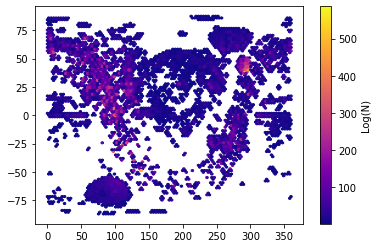

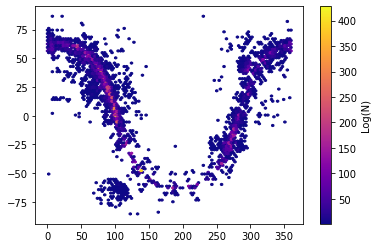

In [27]:
#hexbin plots of the RA and DEC 

#original table
RA_O = T["RA"] #original ra
DEC_O = T["DEC"] #orignal dec
plt.hexbin(RA_O, DEC_O, gridsize=100, cmap = 'plasma', mincnt = 1)
plt.colorbar(label = "Log(N)")
plt.show()

#masked table
RA = thinDisk["RA"]
DEC = thinDisk["DEC"]
plt.hexbin(RA, DEC, gridsize=100, cmap = 'plasma', mincnt = 1)
plt.colorbar(label = "Log(N)")
plt.show()

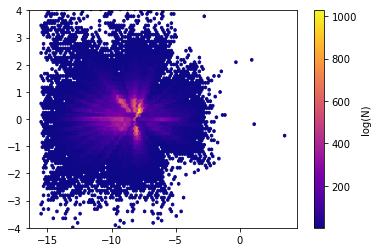

In [28]:
#galactic coordinates plots
#original data set
X_O = T["X"] #original ra
Y_O = T["Y"] #orignal dec
Z_O = T["Z"]
plt.hexbin(X_O, Z_O, gridsize=100, cmap = 'plasma', mincnt = 1)
plt.colorbar(label = "log(N)")
plt.ylim(-4,4)
plt.show()

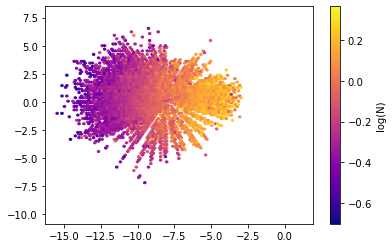

In [29]:
#galactic coordinates plots
#masked data set
X = thinDisk["X"] 
Y = thinDisk["Y"]
Z = thinDisk["Z"]
plt.hexbin(X, Y, C = thinDisk["FE_H"], gridsize=100, cmap = 'plasma', mincnt = 1)
plt.colorbar(label = "log(N)")
plt.show()

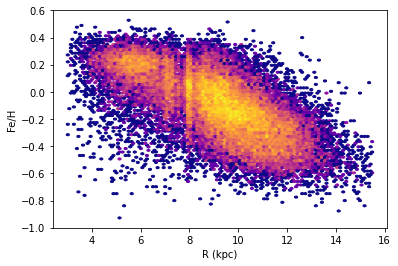

'\nNotes: metallicity content, radius from the galatic center, iron inside the star\nFind: linear regression taking into account the error rate for both Fe/H and R\n'

In [30]:
#[From CC Paper] The [Fe/H] as a function of Galactocentric radius (R)
#for OBAF-type stars in LAMOST with 0.0 < |Z| < 0.2 kpc (greyscaled background). 
R = thinDisk["R"] 
Fe_H = thinDisk["FE_H"]
plt.hexbin(R, Fe_H, gridsize=100, cmap = 'plasma', mincnt = 1, bins = 'log')
plt.xlabel('R (kpc)')
plt.ylabel('Fe/H') 
plt.show()
'''
Notes: metallicity content, radius from the galatic center, iron inside the star
Find: linear regression taking into account the error rate for both Fe/H and R
'''

[-0.05944687  0.44485024]


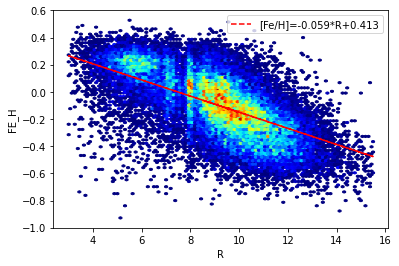

In [46]:
def linReg(x, a, b):
    return a*x+b

error = thinDisk["FE_H_ERR"]
popt, pcov = curve_fit(linReg, thinDisk['R'], thinDisk['FE_H'], p0 = [-1,1], sigma = error)

print(popt)

plt.figure
plt.hexbin(thinDisk["R"], thinDisk["FE_H"], mincnt = 1, cmap = "jet")
plt.xlabel("R")
plt.ylabel("FE_H")
plt.plot(thinDisk["R"], linReg(thinDisk["R"], *popt), "r--", label = "[Fe/H]=-0.059*R+0.413")
plt.legend()
plt.show()

In [32]:
# separates outer disk and inner disk using masks
inner_mask = np.where((thinDisk['R'] < 9) & (thinDisk['R'] > 7))[0]
outer_mask = np.where((thinDisk['R'] < 11) & (thinDisk["R"] > 9))[0]
inner = thinDisk[inner_mask]
outer = thinDisk[outer_mask]
print("inner len: " + str(len(inner)))
print("outer len: " + str (len (outer)))

inner len: 9043
outer len: 14055


-0.019540714 -0.15664302


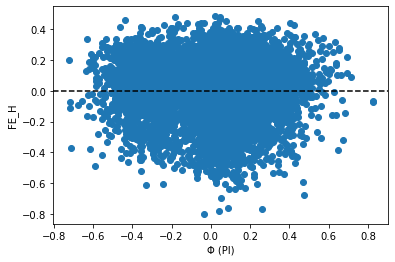

In [33]:
#standard division, average metallcity content of FE_H
innerAverage = np.mean(inner["FE_H"])
outerAverage = np.mean(outer["FE_H"])

print(innerAverage, outerAverage)

plt.scatter(inner["galphi"], inner["FE_H"] - innerAverage)
plt.ylabel("FE_H")
plt.xlabel("Φ (PI)")

plt.axhline(0, ls = "--", c = "k")

Text(0, 0.5, 'Y')

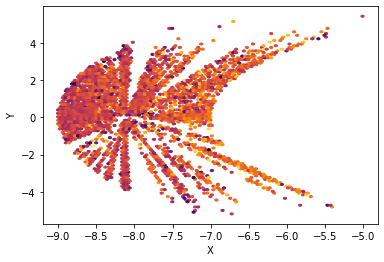

In [48]:
#create hexbin of inner (x,y) and then outer(x,y)
plt.hexbin(inner["X"], inner["Y"], cmap = "inferno", C = inner["FE_H"])
plt.xlabel("X")
plt.ylabel("Y")

<function matplotlib.pyplot.show(close=None, block=None)>

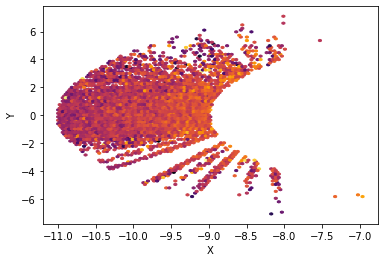

In [35]:
plt.figure
plt.hexbin(outer["X"], outer["Y"], cmap = "inferno", C = outer["FE_H"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show

In [36]:
def spiral_arms_reid2019(plt=False):
    X = []; Y = []
    Xp = []; Yp = []
    Xm = []; Ym = []
    # --- 3kpc arm
    betaref = 15*pi/180 ; Rref = 3.52 ; width = 0.18; phi = -4.2*pi/180
    beta = arange(15,18,0.1)*pi/180
    R = Rref * exp(-(beta-betaref)*tan(phi))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    # --- Norma arm
    betaref = 18*pi/180 ; Rref = 4.46 ; width = 0.14;
    beta = arange(5,54,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 =  -1.0*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 19.5*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    # --- Sect-Cen arm
    betaref = 23*pi/180 ; Rref = 4.91 ; width = 0.23;
    beta = arange(0,104,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 =  14.1*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 12.1*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    # --- Sgr-Car arm
    betaref = 24*pi/180 ; Rref = 6.04 ; width = 0.27;
    beta = arange(2,97,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 =  17.1*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 1.0*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    # --- Local
    betaref = 9*pi/180 ; Rref = 8.26 ; width = 0.31;
    beta = arange(-8,34,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 =  11.4*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 11.4*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)

    # --- Perseus
    betaref = 40*pi/180 ; Rref = 8.87 ; width = 0.35;
    beta = arange(-23,115,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 =  10.3*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 8.7*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    # --- outer arm
    betaref = 18*pi/180 ; Rref = 12.24 ; width = 0.65;
    beta = arange(-16,71,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 =  3.0*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 9.4*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)

    # # --- scutum arm
    # betaref = 27.6*pi/180 ; Rref = 5.0 ; width = 0.17;
    # phi = 19.8*pi/180
    # beta = arange(3,101,0.1)*pi/180
    # R = Rref * exp(-(beta-betaref)*tan(phi))
    # X.append(R*cos(beta));Y.append(R*sin(beta))
    # Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    # Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    # # --- sag arm
    # betaref = 25.6*pi/180 ; Rref = 6.6 ; width = 0.26; phi = 6.9*pi/180
    # beta = arange(-2,68,0.1)*pi/180
    # R = Rref * exp(-(beta-betaref)*tan(phi))
    # X.append(R*cos(beta));Y.append(R*sin(beta))
    # Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    # Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    # # --- local arm
    # betaref = 8.9*pi/180 ; Rref = 8.4 ; width = 0.33; phi = 12.8*pi/180
    # beta = arange(-8,27,0.1)*pi/180
    # R = Rref * exp(-(beta-betaref)*tan(phi))
    # X.append(R*cos(beta));Y.append(R*sin(beta))
    # Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    # Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    # # --- persues arm
    # betaref = 14.2*pi/180 ; Rref = 9.9 ; width = 0.38; phi = 9.4*pi/180
    # beta = arange(-21,88,0.1)*pi/180
    # R = Rref * exp(-(beta-betaref)*tan(phi))
    # X.append(R*cos(beta));Y.append(R*sin(beta))
    # Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    # Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    # # --- scutum arm
    # betaref = 18.6*pi/180 ; Rref = 13.0 ; width = 0.63; phi = 13.8*pi/180
    # beta = arange(-6,56,0.1)*pi/180
    # R = Rref * exp(-(beta-betaref)*tan(phi))
    # X.append(R*cos(beta));Y.append(R*sin(beta))
    # Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    # Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    X = array(X, dtype=object); Y = array(Y, dtype=object)
    Xp = array(Xp, dtype=object); Yp = array(Yp, dtype=object);
    Xm = array(Xm, dtype=object); Ym = array(Ym, dtype=object);
    XX = -X.T; YY=Y.T
    XXp= -Xp.T; YYp=Yp.T; XXm=-Xm.T; YYm= Ym.T
    if plt:
        for kk in range(len(XX)):
            p.plot(XX[kk],YY[kk],ls='-',color='k',lw=2.5)
            p.plot(XXp[kk],YYp[kk],ls='--',color='k',lw=1.5)
            p.plot(XXm[kk],YYm[kk],ls='--',color='k',lw=1.5)
    return -X.T,Y.T, -Xp.T, Yp.T, -Xm.T, Ym.T

(array([array([-3.40005891, -3.39889927, -3.39772892, -3.39654786, -3.39535609,
               -3.39415362, -3.39294045, -3.39171657, -3.39048199, -3.38923671,
               -3.38798073, -3.38671405, -3.38543667, -3.38414859, -3.38284982,
               -3.38154035, -3.38022019, -3.37888934, -3.37754779, -3.37619556,
               -3.37483264, -3.37345903, -3.37207474, -3.37067976, -3.36927411,
               -3.36785777, -3.36643075, -3.36499306, -3.36354469, -3.36208564]),
        array([-4.42546686, -4.42491916, -4.42435796, -4.42378323, -4.42319499,
               -4.42259324, -4.42197797, -4.42134919, -4.4207069 , -4.42005111,
               -4.4193818 , -4.41869898, -4.41800266, -4.41729283, -4.4165695 ,
               -4.41583267, -4.41508233, -4.4143185 , -4.41354117, -4.41275034,
               -4.41194602, -4.41112821, -4.4102969 , -4.40945211, -4.40859382,
               -4.40772205, -4.4068368 , -4.40593806, -4.40502584, -4.40410015,
               -4.40316098, -4.4022083

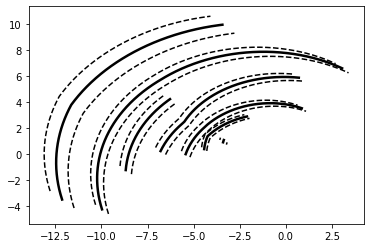

In [37]:
spiral_arms_reid2019(plt=True)

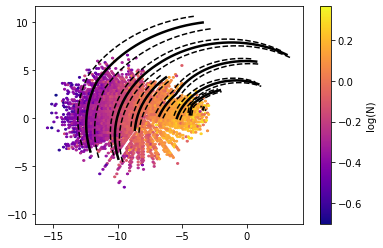

In [38]:
X = thinDisk["X"] 
Y = thinDisk["Y"]
Z = thinDisk["Z"]
plt.hexbin(X, Y, C = thinDisk["FE_H"], gridsize=100, cmap = 'plasma', mincnt = 1)
spiral_arms_reid2019(plt=True)
plt.colorbar(label = "log(N)")
plt.show()

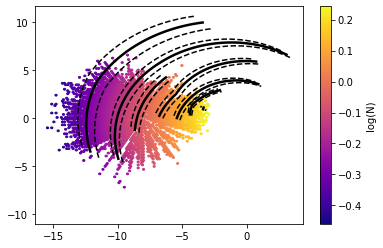

In [39]:
model = (-0.05645253)*thinDisk["R"] + (0.41370373)

X = thinDisk["X"] 
Y = thinDisk["Y"]
Z = thinDisk["Z"]
plt.hexbin(X, Y, C = model, gridsize=100, cmap = 'plasma', mincnt = 1)
spiral_arms_reid2019(plt=True)
plt.colorbar(label = "log(N)")
plt.show()

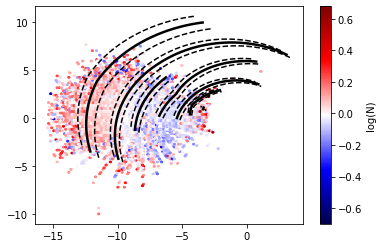

In [44]:
model = (-0.05645253)*thinDisk["R"] + (0.41370373)

X = thinDisk["X"] 
Y = thinDisk["Y"]
Z = thinDisk["Z"]
plt.hexbin(X, Y, C = model - thinDisk["FE_H"], gridsize=100, cmap = 'seismic', mincnt = 0)
spiral_arms_reid2019(plt=True)
plt.colorbar(label = "log(N)")
plt.show()